In [1]:
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Limit GPU Memory Growth to only what's needed
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print('Failed to limit GPU memory')

Failed to limit GPU memory


In [3]:
#Gather Pre-proccessed images 

train_path = 'dataset_training'
valid_path = 'dataset_validation'

train_generator = ImageDataGenerator().flow_from_directory(train_path, target_size=(590,455))
valid_generator = ImageDataGenerator().flow_from_directory(valid_path, target_size=(590,455))


Found 211 images belonging to 3 classes.
Found 37 images belonging to 3 classes.


In [4]:
#Build Model 

base_model = MobileNetV3Small(weights='imagenet', include_top = False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs = preds)


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                           

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_9 (Multiply)          (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_16[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [6]:
for layers in model.layers[:-5]:
    layers.trainable = False
    

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                           

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_9 (Multiply)          (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_16[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [8]:
epochs = 7

optimizer = Adam(learning_rate = 0.0001)

model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

model.fit(train_generator, validation_data=valid_generator, epochs = epochs)

Epoch 1/7
7/7 [==============================] - 31s 4s/step - loss: 0.9122 - accuracy: 0.5545 - val_loss: 0.5446 - val_accuracy: 0.9730
Epoch 2/7
7/7 [==============================] - 24s 4s/step - loss: 0.5332 - accuracy: 0.9479 - val_loss: 0.2971 - val_accuracy: 1.0000
Epoch 3/7
7/7 [==============================] - 25s 4s/step - loss: 0.3294 - accuracy: 0.9668 - val_loss: 0.1644 - val_accuracy: 1.0000
Epoch 4/7
7/7 [==============================] - 25s 4s/step - loss: 0.2102 - accuracy: 0.9763 - val_loss: 0.1201 - val_accuracy: 0.9730
Epoch 5/7
7/7 [==============================] - 23s 3s/step - loss: 0.1462 - accuracy: 0.9810 - val_loss: 0.0973 - val_accuracy: 0.9730
Epoch 6/7
7/7 [==============================] - 26s 4s/step - loss: 0.1100 - accuracy: 0.9810 - val_loss: 0.0820 - val_accuracy: 0.9730
Epoch 7/7
7/7 [==============================] - 30s 4s/step - loss: 0.0869 - accuracy: 0.9810 - val_loss: 0.0796 - val_accuracy: 0.9730


In [9]:
test_path = 'dataset_test'
test_generator = ImageDataGenerator().flow_from_directory(test_path, target_size=(590,455))
predictions = model.predict(x = test_generator, verbose = 0)

Found 15 images belonging to 3 classes.


In [10]:
test_labels = test_generator.classes
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
test_generator.class_indices

{'-K': 0, '-N': 1, 'Healthy': 2}

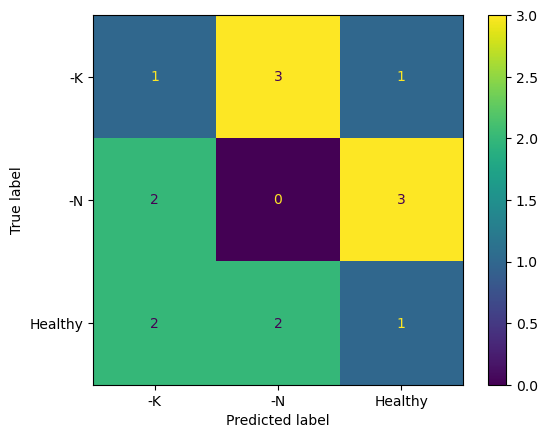

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-K', '-N', 'Healthy'])
disp.plot()
plt.show()

In [12]:
from sklearn.metrics import classification_report 

print(classification_report(test_labels,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00         5
           2       0.20      0.20      0.20         5

    accuracy                           0.13        15
   macro avg       0.13      0.13      0.13        15
weighted avg       0.13      0.13      0.13        15

